# Read and process data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號

In [2]:
df = pd.read_csv('所得房價消費分析.csv')
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)

* 平均開立張數  =  開立總張數  除以  該維度下營業家數
* 平均開立金額  =  開立總金額  除以  該維度下營業家數
* 平均客單價 =  總客單價  除以  該維度下營業家數

In [3]:
df.info() #check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49086 entries, 0 to 49085
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   發票年月    49086 non-null  int64 
 1   縣市代碼    49086 non-null  object
 2   縣市名稱    49086 non-null  object
 3   鄉鎮市區代碼  49086 non-null  int64 
 4   鄉鎮市區名稱  49086 non-null  object
 5   行業名稱    49086 non-null  object
 6   平均開立張數  49086 non-null  int64 
 7   平均開立金額  49086 non-null  int64 
 8   平均客單價   49086 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.4+ MB


data process

In [4]:
#將日期傳換成年和月
## == 格式說明 ==
## 因原始資料的日期格式為西元年月的六位連續數字，前四位數為年分，後兩位數為月份
df['year'] = df['發票年月'] // 100
df['month'] = df['發票年月'] % 100
del df['發票年月']

# 組合「縣市+鄉鎮市區」
df['縣鄉鎮市區'] = df['縣市名稱'] + df['鄉鎮市區名稱']

In [5]:
df #check the data shape and content


,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,行業名稱,平均開立張數,平均開立金額,平均客單價,year,month,縣鄉鎮市區
0,F,新北市,16,鶯歌區,食品、飲料及菸草製品零售業,4541,4522267,996,2021,10,新北市鶯歌區
1,B,臺中市,57,神岡區,餐飲業,5126,743276,145,2021,10,臺中市神岡區
2,O,新竹市,1,東 區,食品、飲料及菸草製品零售業,5486,1347875,246,2021,10,新竹市東 區
3,D,臺南市,70,新市區,餐飲業,5632,799366,142,2021,10,臺南市新市區
4,T,屏東縣,3,東港鎮,餐飲業,6055,1071876,177,2021,10,屏東縣東港鎮
...,...,...,...,...,...,...,...,...,...,...,...
49081,O,新竹市,2,北 區,超級市場,23799,7768729,326,2023,9,新竹市北 區
49082,H,桃園市,1,桃園區,超級市場,23884,7337161,307,2023,9,桃園市桃園區
49083,J,新竹縣,5,竹北市,百貨公司,71944,93526643,1300,2023,9,新竹縣竹北市
49084,A,臺北市,10,中山區,百貨公司,192876,241098104,1250,2023,9,臺北市中山區


# EDA Exploratory Data Analysis

資料摘要：檢視各數值欄位的分佈（均值、中位數、標準差）

In [6]:
obs_column = ['平均開立張數','平均開立金額','平均客單價','year']
abstract = pd.DataFrame(0, index = obs_column, columns = ['mean','std','var','min','25%','50%','75%','max'])
for col in obs_column:
    abstract.loc[col,'mean'] = df[col].mean()
    abstract.loc[col,'std'] = df[col].std()
    abstract.loc[col,'var'] = df[col].var()
    abstract.loc[col,'min'] = df[col].min()
    abstract.loc[col,'25%'] = df[col].quantile(0.25)
    abstract.loc[col,'50%'] = df[col].quantile(0.5)
    abstract.loc[col,'75%'] = df[col].quantile(0.75)
    abstract.loc[col,'max'] = df[col].max()

C:\Users\user\AppData\Local\Temp\ipykernel_5420\2799556646.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13898.668642790204' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  abstract.loc[col,'mean'] = df[col].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_5420\2799556646.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13818.838528410737' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  abstract.loc[col,'std'] = df[col].std()
C:\Users\user\AppData\Local\Temp\ipykernel_5420\2799556646.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '190960298.274289' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  abstract.lo

In [7]:
abstract

,mean,std,var,min,25%,50%,75%,max
平均開立張數,1.389867e+04,1.381884e+04,1.909603e+08,16,4695.0,14381.0,17827,309155
平均開立金額,4.881683e+06,1.797752e+07,3.231912e+14,33590,1324760.5,2206781.5,3371991,542486725
平均客單價,4.279705e+02,9.122180e+02,8.321416e+05,61,147.0,200.0,309,48869
year,2.022450e+03,1.082978e+00,1.172841e+00,2021,2021.0,2022.0,2023,2024


直方圖：展示平均開立金額與平均客單價的分佈

[Text(0, 0, '13852.31'),
 Text(0, 0, '13674.64'),
 Text(0, 0, '14032.81'),
 Text(0, 0, '14056.90')]

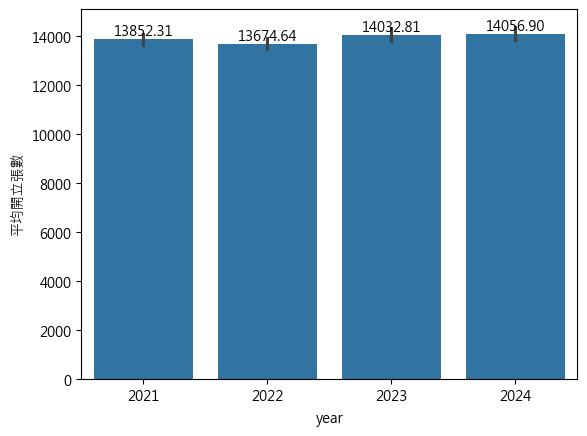

In [8]:
ax = sns.barplot(data=df, x='year', y='平均開立張數')
bars = ax.containers[0]
ax.bar_label(bars, fmt='%.2f', label_type='edge')

[Text(0, 0, '387.81'),
 Text(0, 0, '414.37'),
 Text(0, 0, '449.99'),
 Text(0, 0, '463.59')]

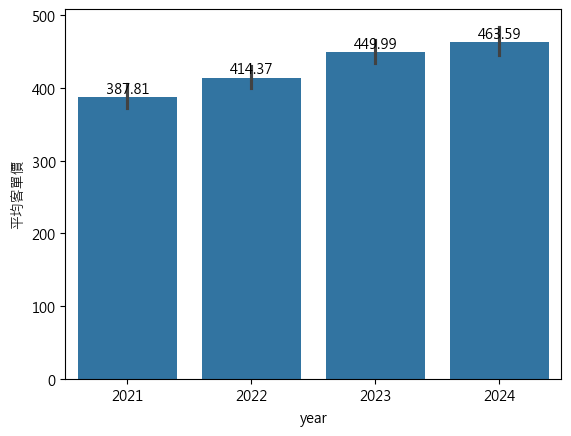

In [9]:
ax = sns.barplot(data=df, x='year', y='平均客單價')
bars = ax.containers[0]
ax.bar_label(bars, fmt='%.2f', label_type='edge')

Text(0, 0.5, 'avg_consumer_price')

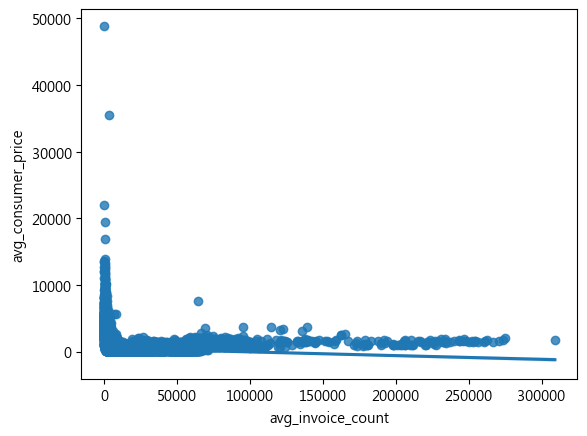

In [10]:
ax = sns.regplot(data=df, x='平均開立張數', y='平均客單價')
ax.set_xlabel('avg_invoice_count')
ax.set_ylabel('avg_consumer_price')

seems like no relation

使用折線圖展示歷年各鄉鎮市區的消費變化趨勢

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

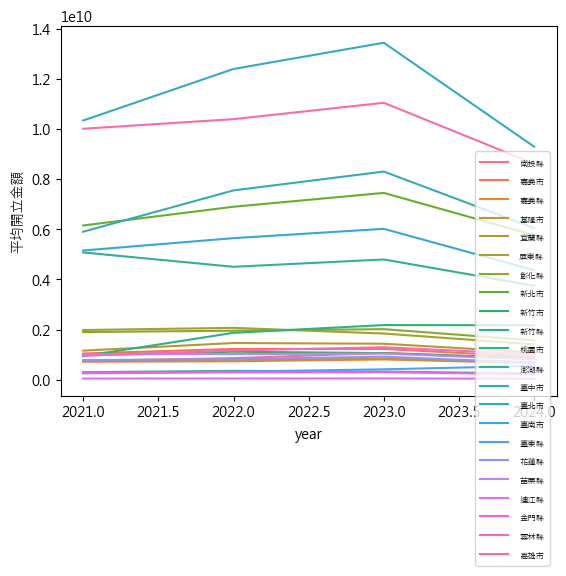

In [11]:
consumption_of_county = df.groupby(['縣市名稱','year'])['平均開立金額'].sum().reset_index()
ax = sns.lineplot(data=consumption_of_county, x='year', y='平均開立金額', hue='縣市名稱')
ax.legend(loc='center right', bbox_to_anchor=(1, 0.1))
plt.setp(ax.get_legend().get_texts(), fontsize='6') # for legend text

視覺效果不如預期，改使用多層次推疊圖

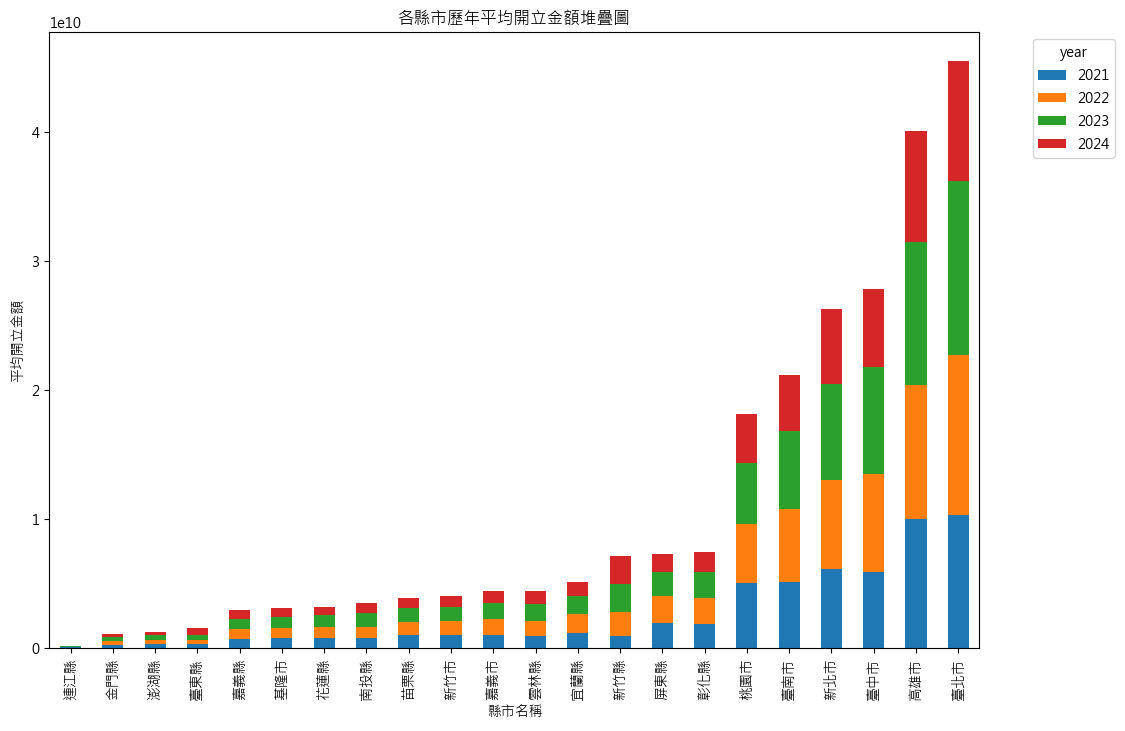

In [12]:
y = df.groupby(['縣市名稱', 'year'])['平均開立金額'].sum().unstack()

# 將各縣市平均開立金額由小到大排序
y_sorted = y.sum(axis=1).sort_values().index
y = y.loc[y_sorted]

y.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('縣市名稱')
plt.ylabel('平均開立金額')
plt.title('各縣市歷年平均開立金額堆疊圖')
plt.legend(title='year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



熱力圖分析縣市與行業之間的關聯性

In [13]:
df['行業名稱'].nunique()

8

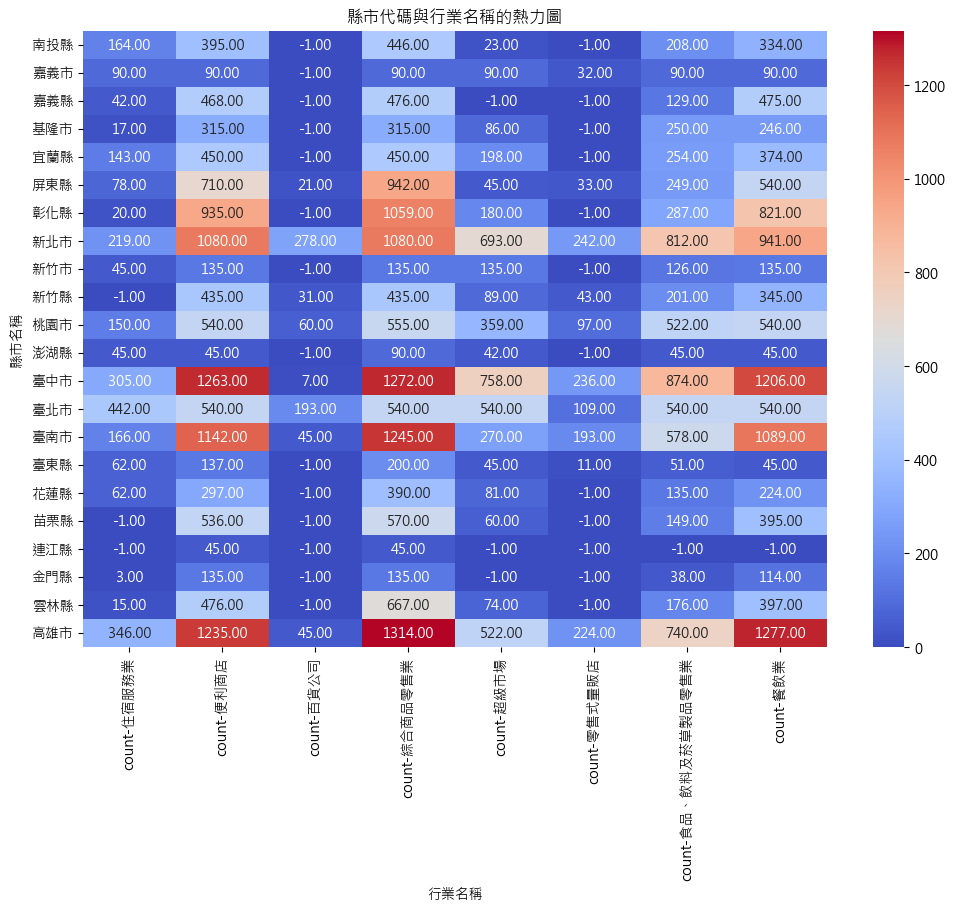

In [14]:
county_job = df.groupby('縣市名稱')['行業名稱']
county_job = pd.DataFrame(county_job.value_counts())
county_job = county_job.unstack().fillna(-1)
plt.figure(figsize=(12, 8))
sns.heatmap(county_job, annot=True, fmt=".2f", cmap="coolwarm")
plt.xlabel('行業名稱')
plt.ylabel('縣市名稱')
plt.title('縣市代碼與行業名稱的熱力圖')
plt.show()

消費金額最高的行業及其對應的鄉鎮市區

In [15]:
county_job = df.groupby(['縣鄉鎮市區','行業名稱'])['平均開立金額'].sum()
county_job = pd.DataFrame(county_job).sort_values(by='平均開立金額', ascending=False)
county_job = county_job.groupby('行業名稱').head(1)
county_job

,,平均開立金額
縣鄉鎮市區,行業名稱,
高雄市前鎮區,百貨公司,16768325179
臺中市南屯區,零售式量販店,3620350632
高雄市鼓山區,超級市場,2773413610
高雄市前金區,綜合商品零售業,1299458983
新竹市香山區,食品、飲料及菸草製品零售業,579195036
宜蘭縣宜蘭市,住宿服務業,569285437
臺北市松山區,便利商店,263827320
臺北市萬華區,餐飲業,77441180


輸出成處理過的csv

In [17]:
df.to_csv('所得房價消費分析_處理後.csv', index=False) 
print('Output CSV File Saved')

Output CSV File Saved
